In [37]:
##### import sys
from time import time
import numpy as np
import pandas as pd
import os.path
from os import path
from scenario import Scenario
from sir_model import EpidemicModel, patient_zeros_states, symptomatic_individuals
# SIR parameters
location="networks"
N=50000
## new try with 100 spreaders
N_patient_zero = 20;
lamb = 0.05;
mu = 0.05;
scale=1.0; # Easy Case
T=100;
t1 = 10;
# trac parameters
trac_tau = 5;
# MF parameters
MF_taus = [5];
MF_deltas = [15];
# observation parameters
n_rankings = [50, 100, 150, 200]
#seeds=[2]
#n_rankings = [150]
seeds=[1,2]
#seed = int(sys.argv[2]);
#seeds for running [32,123,456]
#seed=int(sys.argv[1]);
################################################
n_ranking = n_rankings[0]
MF_tau = MF_taus[0];
MF_delta = MF_deltas[0];

scenario_rnds = {}
scenario_tracs = {}
scenario_MFs = {}
scenario_BPs = {}
for seed in seeds:
    scenario_rnds[seed] = {}
    scenario_tracs[seed]  = {}
    scenario_MFs[seed]  = {}
    scenario_BPs[seed] = {}
    for n_ranking in n_rankings:
    #no_int = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed), sep="\t")
        scenario_rnds[seed][n_ranking] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_rnd.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking), sep="\t")
        scenario_tracs[seed][n_ranking] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")
        scenario_MFs[seed][n_ranking] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_MF_t%d_d%d.csv"%(N/1000,T,t1,
                                                                                                                    N_patient_zero,mu,lamb,seed,n_ranking,MF_tau,MF_delta), sep="\t")
        scenario_BPs[seed][n_ranking] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d.csv"%(N,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
                      , sep="\t")

#scenario_BP_tau = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d_tau.csv"%(N,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
#              , sep="\t")



In [46]:
scenario_MFs[1][50]["I"][2:40]

2      182
3      204
4      251
5      297
6      327
7      367
8      396
9      433
10     465
11     528
12     589
13     647
14     700
15     762
16     820
17     863
18     910
19     964
20    1006
21    1041
22    1102
23    1146
24    1187
25    1240
26    1291
27    1334
28    1373
29    1394
30    1442
31    1472
32    1488
33    1502
34    1536
35    1569
36    1596
37    1631
38    1674
39    1730
Name: I, dtype: int64

In [47]:
scenario_BPs[1][50]["I"][0:40]

0      132
1      166
2      191
3      217
4      254
5      278
6      325
7      373
8      411
9      450
10     475
11     501
12     525
13     568
14     593
15     638
16     684
17     721
18     771
19     811
20     868
21     890
22     941
23     987
24    1039
25    1085
26    1123
27    1173
28    1226
29    1305
30    1356
31    1418
32    1473
33    1518
34    1572
35    1639
36    1704
37    1776
38    1854
39    1914
Name: I, dtype: int64

In [63]:
free = pd.DataFrame()
free["MF_fb"] = scenario_MFs[1][50]["free_birds"]
free["BP_fb"] = scenario_BPs[1][50]["free_birds"]
free["MF_I"] = scenario_MFs[1][50]["I"]
free["BP_I"] = scenario_BPs[1][50]["I"]
free[0:60]

,MF_fb,BP_fb,MF_I,BP_I
0,132,131,132,132
1,154,164,155,166
2,178,181,182,191
3,195,199,204,217
4,239,229,251,254
5,279,252,297,278
6,292,284,327,325
7,305,304,367,373
8,304,315,396,411
9,312,314,433,450


In [48]:
scenario_BPs[1][50]["free_birds"][20:40]

20     472
21     462
22     490
23     523
24     562
25     589
26     615
27     640
28     665
29     712
30     741
31     773
32     808
33     822
34     860
35     912
36     950
37     986
38    1052
39    1078
Name: free_birds, dtype: int64

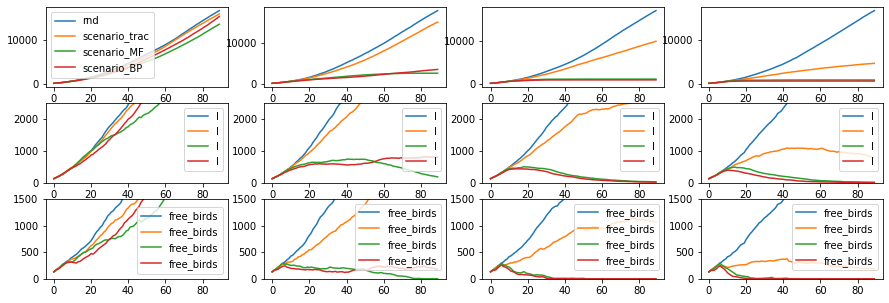

In [45]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, len(n_rankings), figsize=(15, 5))
seed=1
for i, n_ranking in enumerate(n_rankings):

    ax = scenario_rnds[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax = axs[0][i], label="rnd")
    ax = scenario_tracs[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_trac")
    ax = scenario_MFs[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_MF")
    ax = scenario_BPs[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_BP")
    
    ax = scenario_rnds[seed][n_ranking][["I"]].plot(ax = axs[1][i], label="rnd")
    ax = scenario_tracs[seed][n_ranking][["I"]].plot(ax=ax, label="scenario_trac")
    ax = scenario_MFs[seed][n_ranking][["I"]].plot(ax=ax, label="scenario_MF")
    ax = scenario_BPs[seed][n_ranking][["I"]].plot(ax=ax, label="scenario_BP")
    ax.set_ylim(0,2500)

    q = "free_birds"
    ax = scenario_rnds[seed][n_ranking][[q]].plot(ax = axs[2][i], label="rnd")
    ax = scenario_tracs[seed][n_ranking][[q]].plot(ax=ax, label="scenario_trac")
    ax = scenario_MFs[seed][n_ranking][[q]].plot(ax=ax, label="scenario_MF")
    ax = scenario_BPs[seed][n_ranking][[q]].plot(ax=ax, label="scenario_BP")
    ax.set_ylim(0,1500)
#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP auto")
#axs[0][1].set_ylim(0,2500)
#axs[0][2].set_ylim(0,2500)
#ax.set_xlim(0,30)
axs[0][0].legend()
axs[1][0].legend()
axs[2][0].legend()

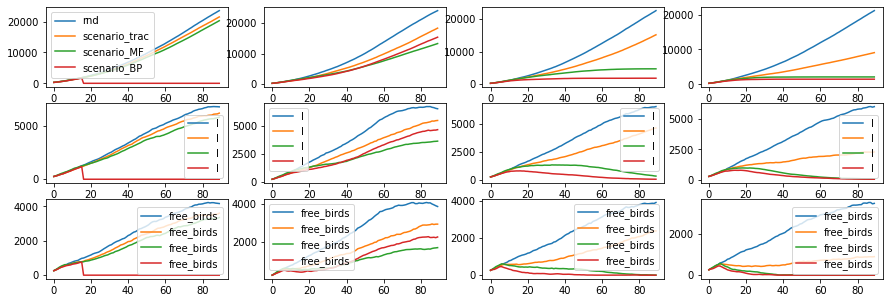

In [38]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, len(n_rankings), figsize=(15, 5))
seed=2
for i, n_ranking in enumerate(n_rankings):

    ax = scenario_rnds[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax = axs[0][i], label="rnd")
    ax = scenario_tracs[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_trac")
    ax = scenario_MFs[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_MF")
    ax = scenario_BPs[seed][n_ranking][["I", "R"]].sum(axis=1).plot(ax=ax, label="scenario_BP")
    
    ax = scenario_rnds[seed][n_ranking][["I"]].plot(ax = axs[1][i], label="rnd")
    ax = scenario_tracs[seed][n_ranking][["I"]].plot(ax=ax, label="scenario_trac")
    ax = scenario_MFs[seed][n_ranking][["I"]].plot(ax=ax, label="scenario_MF")
    ax = scenario_BPs[seed][n_ranking][["I"]].plot(ax=ax, label="scenario_BP")
    
    q = "free_birds"
    ax = scenario_rnds[seed][n_ranking][[q]].plot(ax = axs[2][i], label="rnd")
    ax = scenario_tracs[seed][n_ranking][[q]].plot(ax=ax, label="scenario_trac")
    ax = scenario_MFs[seed][n_ranking][[q]].plot(ax=ax, label="scenario_MF")
    ax = scenario_BPs[seed][n_ranking][[q]].plot(ax=ax, label="scenario_BP")

#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP auto")
#ax.set_ylim(400,2500)
#ax.set_xlim(0,30)
axs[0][0].legend()
axs[1][0].legend()
axs[2][0].legend()

In [ ]:
q = "I"
#ax = no_int[q].plot()
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
ax = scenario_BP_tau[q].plot(ax=ax, label="scenario_BP auto")
#ax.set_ylim(0,1500)
ax.set_xlim(0,100)
ax.legend()

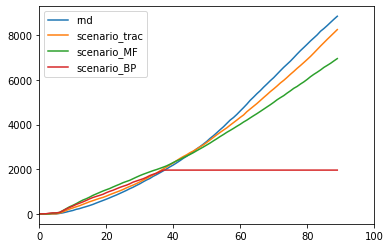

In [455]:
q = "q"
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
#ax = scenario_BP_plus[q].plot(ax=ax, label="scenario_BP auto")
#ax.set_ylim(0,1500)
ax.set_xlim(0,100)

ax.legend()

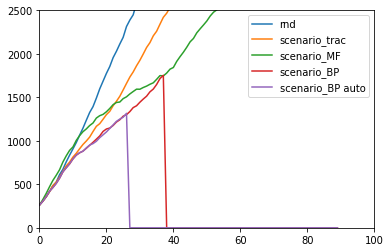

In [456]:
q = "I"
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
ax = scenario_BP_tau[q].plot(ax=ax, label="scenario_BP auto")
ax.set_ylim(0,2500)
ax.set_xlim(0,100)

ax.legend()

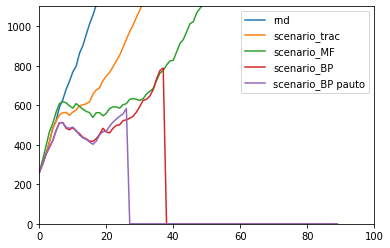

In [457]:
q = "free_birds"
#ax = no_int[q].plot(label="no_int")
ax = scenario_rnd[q].plot(label="rnd")
ax = scenario_trac[q].plot(ax=ax, label="scenario_trac")
ax = scenario_MF[q].plot(ax=ax, label="scenario_MF")
ax = scenario_BP[q].plot(ax=ax, label="scenario_BP")
ax = scenario_BP_tau[q].plot(ax=ax, label="scenario_BP pauto")
ax.set_ylim(0,1100)
ax.set_xlim(0,100)

ax.legend()

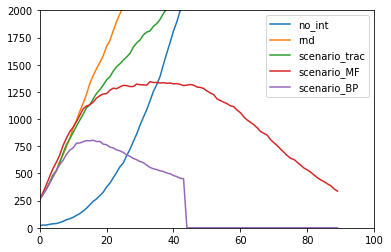

In [355]:
ax = no_int["I"].plot(label="no_int")
ax = scenario_rnd["I"].plot(ax=ax, label="rnd")
ax = scenario_trac["I"].plot(ax=ax, label="scenario_trac")
ax = scenario_MF["I"].plot(ax=ax, label="scenario_MF")
ax = scenario_BP["I"].plot(ax=ax, label="scenario_BP")
ax.set_ylim(0,2000)
ax.set_xlim(0,100)

ax.legend()

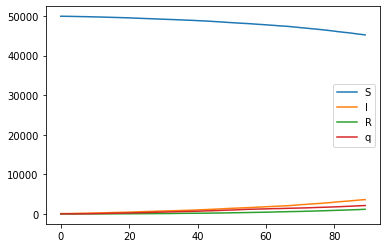

In [99]:
scenario_trac.plot()

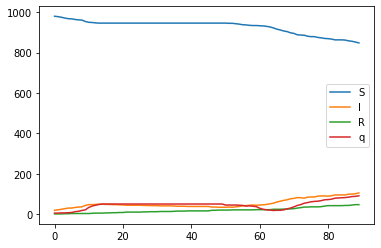

In [8]:
scenario_MF.plot()

In [4]:
import numpy as np
import networkx as nx
N=50000
scale=1.0; # Easy Case
radius = 5*scale
def p_dist(d):
    return np.exp(-d/scale)
x_pos = np.sqrt(N)*np.random.rand(N)
y_pos = np.sqrt(N)*np.random.rand(N)
# for soft geometric graph generation
pos  = {i: (x, y) for i, (x, y) in enumerate(zip(x_pos,y_pos))}


In [6]:
g=nx.soft_random_geometric_graph(
    N, radius=radius, p_dist=p_dist, pos=pos
)


In [7]:
%time nx.soft_random_geometric_graph(N, radius=radius, p_dist=p_dist, pos=pos)

CPU times: user 10.4 s, sys: 239 ms, total: 10.6 s
Wall time: 10.6 s
